### Imports necessary for running the program

In [21]:
# -*- coding: utf-8 -*-
"""
Created on Sun May  5 23:01:42 2019

@author: Ahmed
"""

from openpyxl import load_workbook
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import pandas as pd
'''df = pd.read_excel("MLDataSet.xlsx")
df2 = pd.read_excel("ADRs.xlsx")
df3 = pd.read_excel("DS.xlsx")
df4 = pd.read_excel("Mental.xlsx")

df5=[df, df2,  df3, df4]

result = pd.concat([df,df2,df3, df4], axis=1, join_axes=[df.index])'''
#result.to_excel('result.xlsx')


'df = pd.read_excel("MLDataSet.xlsx")\ndf2 = pd.read_excel("ADRs.xlsx")\ndf3 = pd.read_excel("DS.xlsx")\ndf4 = pd.read_excel("Mental.xlsx")\n\ndf5=[df, df2,  df3, df4]\n\nresult = pd.concat([df,df2,df3, df4], axis=1, join_axes=[df.index])'

In [2]:
def removeColumns(result):
    del result['Pain']
    del result['Content']
    del result['Filtered']
    del result['Stemmed']
    del result['big1']
    del result['big2']
    del result['small1']
    del result['small2']
    del result['Height']
    del result['Joined']
    del result['Posted']
    

In [3]:
def vectorizeCount(result):
    '''for i in range(len(result)):
        if result[i]==0:
            result[i]=0
        if result[i]>0 and result[i]<=3:
            result[i]=1
        if result[i]>3:
            result[i]=2'''
    for i in range(len(result)):
        if result.at[i,'MentalCount']==0:
            result.at[i,'MentalCount']=0
        if result.at[i,'MentalCount']>0 and result.at[i,'MentalCount']<=3:
            result.at[i,'MentalCount']=1
        if result.at[i,'MentalCount']>3:
            result.at[i,'MentalCount']=2
            
        if result.at[i,'ADRCount']==0:
            result.at[i,'ADRCount']=0
        if result.at[i,'ADRCount']>0 and result.at[i,'MentalCount']<=3:
            result.at[i,'ADRCount']=1
        if result.at[i,'ADRCount']>3:
            result.at[i,'ADRCount']=2

        if result.at[i,'DieaseCount']==0:
            result.at[i,'DieaseCount']=0
        if result.at[i,'DieaseCount']>0 and result.at[i,'DieaseCount']<=3:
            result.at[i,'DieaseCount']=1
        if result.at[i,'DieaseCount']>3:
            result.at[i,'DieaseCount']=2
    return result

### manipulating data to prepare for classification

In [4]:
def manipulate(result,label):
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    result['Gender']=imp_mean.fit_transform(result['Gender'].values.reshape(-1, 1))
    result = vectorizeCount(result)
    for i in range(len(result)):
        if result.at[i,'Gender']=='Male':
            result.at[i,'Gender']=0
        if result.at[i,'Gender']=='Female':
            result.at[i,'Gender']=1
    result['Drug']=LabelEncoder().fit_transform(result['Drug'])
    if 'Unnamed: 0' in result:
        del result['Unnamed: 0'] 
    result['DrugFamily']=LabelEncoder().fit_transform(result['DrugFamily'])
    labels=result.iloc[:][label]
    del result[label]
    #removeColumns(result)
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
    result['Age']=imp_mean.fit_transform(result['Age'].values.reshape(-1, 1))
    if 'Height' in result:
        result['Height']=imp_mean.fit_transform(result['Height'].values.reshape(-1, 1))
    return result,labels

In [5]:

#asklabel=pd.read_excel('asklabels.xlsx')
#labels=asklabel.iloc[:]['MICROCEPHALY , EPILEPSY , AND DIABETES SYNDROME']

In [6]:

def SMOTE(begin,columns):
    from imblearn.over_sampling import SMOTENC
    x=[1]
    x.extend(list(range(begin,len(columns))))
    sm=SMOTENC(random_state=42, categorical_features=x)
    return sm


### Datasets

In [7]:
label='ADRCount'
asklabel='ADRCount'

#from collections import Counter
#X_res, y_res = sm.fit_resample(result, result_labels)
#print(Counter(result_labels))
#print(Counter(y_res))
def prepareDataset(label,asklab):
    from imblearn.over_sampling import SMOTENC
    
    
    result=pd.read_excel('result_reduced.xlsx')
    weighted=pd.read_excel('Weighted_reduced.xlsx')
    blood=pd.read_excel('blood_reduced.xlsx')
    ask=pd.read_excel('askapatient_reduced.xlsx')

    result,result_labels=manipulate(result,label)
    weighted,weighted_labels=manipulate(weighted,label)
    blood,blood_labels=manipulate(blood,label)
    ask,ask_labels=manipulate(ask,asklab)
    
 

    sm1 = SMOTE(2,result.columns)
    sm2 = SMOTE(4,weighted.columns)
    sm3 = SMOTE(4,blood.columns)
    sm4 = SMOTE(2,ask.columns)
    #Applying SMOTENC
    result,result_labels=sm1.fit_resample(result,result_labels)
    weighted,weighted_labels=sm2.fit_resample(weighted,weighted_labels)
    blood,blood_labels=sm3.fit_resample(blood,blood_labels)
    ask,ask_labels=sm4.fit_resample(ask,ask_labels)
    return result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels


In [8]:
label='ADRCount'
asklabel='ADRCount'

#from collections import Counter
#X_res, y_res = sm.fit_resample(result, result_labels)
#print(Counter(result_labels))
#print(Counter(y_res))
def prepareDatasetNoSmote(label,asklab):
    from imblearn.over_sampling import SMOTENC
    
    sm = SMOTENC(random_state=42, categorical_features=[0, 1,3])
    
    result=pd.read_excel('result_reduced.xlsx')
    weighted=pd.read_excel('Weighted_reduced.xlsx')
    blood=pd.read_excel('blood_reduced.xlsx')
    ask=pd.read_excel('askapatient_reduced.xlsx')


    result,result_labels=manipulate(result,label)
    weighted,weighted_labels=manipulate(weighted,label)
    blood,blood_labels=manipulate(blood,label)
    ask,ask_labels=manipulate(ask,asklab)
    
    
    #Applying SMOTENC
    #result,result_labels=sm.fit_resample(result,result_labels)
    #weighted,weighted_labels=sm.fit_resample(weighted,weighted_labels)
    #blood,blood_labels=sm.fit_resample(blood,blood_labels)
    #ask,ask_labels=sm.fit_resample(ask,ask_labels)
    return result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels


In [9]:
'''for i in weighted:
    if i not in result:
        if i != 'weights2':
            del weighted[i]
weighted.to_excel('Weighted.xlsx')'''

"for i in weighted:\n    if i not in result:\n        if i != 'weights2':\n            del weighted[i]\nweighted.to_excel('Weighted.xlsx')"

In [10]:
#ask_labels

In [11]:
'''for i in weighted:
    print (weighted[i])'''

'for i in weighted:\n    print (weighted[i])'

In [12]:
def get_score(model, X_train,X_test,Y_train,Y_test):
    model.fit(X_train,Y_train)
    return model.score(X_test,Y_test)

### 10-Fold Cross validation

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#cross_val_score(RandomForestClassifier(n_estimators=1000),result,result_labels,cv=10)

In [14]:
#This was used for some other no longer existing purposes
def getMissingPercentage(feature):
    #nancount = int(result[result[feature].isnull()][feature].shape[0])
    nancount = int(result[result[feature]==1][feature].shape[0])
    size=int(result.shape[0])
    print (nancount)
    print ((nancount*100)/size)
#getMissingPercentage('Pvc')

In [28]:
def importance(result,result_labels):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.feature_selection import SelectFromModel
    from collections import Counter
    
    X_train, X_test, Y_train, Y_test = train_test_split(result, result_labels, test_size=0.30, random_state=42)
    X_train, X_test, Y_train, Y_test = pd.DataFrame(X_train),pd.DataFrame(X_test),pd.DataFrame(Y_train),pd.DataFrame(Y_test),
    #print(Counter(result_labels))
    sel = SelectFromModel(RandomForestClassifier(n_estimators = 500))
    sel.fit(X_train, Y_train)
    #print(sel.get_support())
    selected_feat= X_train.columns[(sel.get_support())]
    
    #print(len(selected_feat))
    print(selected_feat)


    return selected_feat

In [19]:
def plotResult(name,max_res,max_wei,max_bld,max_ask,x1,x2,x3,x4):
    import matplotlib
    import matplotlib.pyplot as plt
    import numpy as np
    fig, ax = plt.subplots()
    width = 0.2

    acc_m = (max_res['Accuracy'][x1],max_wei['Accuracy'][x2],max_bld['Accuracy'][x3],max_ask['Accuracy'][x4])
    pre_m = (max_res['Precision'][x1],max_wei['Precision'][x2],max_bld['Precision'][x3],max_ask['Precision'][x4])
    rec_m = (max_res['Recall'][x1],max_wei['Recall'][x2],max_bld['Recall'][x3],max_ask['Recall'][x4])
    fse_m = (max_res['FScore'][x1],max_wei['FScore'][x2],max_bld['FScore'][x3],max_ask['FScore'][x4])

    ind = np.arange(len(acc_m)) 
    old_ind =  ind
    rects1 = ax.bar(ind,acc_m, width=width ,label='accuracy')
    ind = ind + width
    rects2 = ax.bar(ind,pre_m, width=width,label='Precision')
    ind = ind + width
    rects3 = ax.bar(ind,rec_m, width=width,label='recall')
    ind = ind + width
    rects4 = ax.bar(ind,fse_m, width=width ,label='fscore')


    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_title(name)
    ax.set_xticks(old_ind+ width *2)
    ax.set_xticklabels(('complete', 'weighted', 'pressure', 'ask'))
    box = ax.get_position()
    ax.set_position([box.x0, box.y0,box.width, box.height * 0.6])
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True,shadow=True, ncol=4)
    fig.tight_layout()
    plt.show()

In [16]:
'''from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
kf = KFold(n_splits=10)

scores_rf=[]

for train_index, test_index in kf.split(result):
    X_train, X_test, Y_train, Y_test = result.iloc[train_index], result.iloc[test_index], result_labels.iloc[train_index],result_labels.iloc[test_index]
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=400),X_train, X_test, Y_train, Y_test))'''

'from sklearn.model_selection import KFold\nfrom sklearn.ensemble import RandomForestClassifier\nkf = KFold(n_splits=10)\n\nscores_rf=[]\n\nfor train_index, test_index in kf.split(result):\n    X_train, X_test, Y_train, Y_test = result.iloc[train_index], result.iloc[test_index], result_labels.iloc[train_index],result_labels.iloc[test_index]\n    scores_rf.append(get_score(RandomForestClassifier(n_estimators=400),X_train, X_test, Y_train, Y_test))'

### Random Forest Classifier Function 

In [17]:
def randomForest(result,result_labels,estimators,DataSet):
    from sklearn.model_selection import KFold
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report
    from sklearn.metrics import f1_score
    from collections import Counter
    
    X_train, X_test, Y_train, Y_test = train_test_split(result, result_labels, test_size=0.30, random_state=42)
    print(Counter(result_labels))
    clf = RandomForestClassifier(n_estimators=estimators,random_state=0)
    clf.fit(X_train, Y_train)
    pred=clf.predict(X_test)
    accuracy=(accuracy_score(Y_test, pred))
    #print (accuracy)
    scores_rf=(precision_recall_fscore_support(Y_test,pred, average='macro'))
    #print(DataSet)
    #print (pred)
    #print(classification_report(Y_test,pred,labels=[0,1,2]))
        
    return accuracy,scores_rf

### Random Forest

100
Counter({0: 1168, 1: 1168})
Counter({0: 89, 1: 89})
Counter({0: 334, 1: 334})
Counter({0: 590, 1: 590})
Res: Accuracy: 0.8202567760342369 # Scores: (0.8270632368703108, 0.8236265887842843, 0.8200630714320638, None)
Wei: Accuracy: 0.9074074074074074 # Scores: (0.8969144460028051, 0.9161764705882353, 0.9033989266547406, None)
Bld: Accuracy: 0.8656716417910447 # Scores: (0.8656250000000001, 0.8653350515463918, 0.8654585120360959, None)
Ask: Accuracy: 0.7937853107344632 # Scores: (0.7964872394248935, 0.7966867469879518, 0.7937836651637873, None)
200
Counter({0: 1168, 1: 1168})
Counter({0: 89, 1: 89})
Counter({0: 334, 1: 334})
Counter({0: 590, 1: 590})
Res: Accuracy: 0.8202567760342369 # Scores: (0.8265126313362537, 0.8234919806164238, 0.8200953234479387, None)
Wei: Accuracy: 0.9074074074074074 # Scores: (0.8969144460028051, 0.9161764705882353, 0.9033989266547406, None)
Bld: Accuracy: 0.8756218905472637 # Scores: (0.8760688009544642, 0.8749504361617764, 0.875313267660852, None)
Ask: Acc

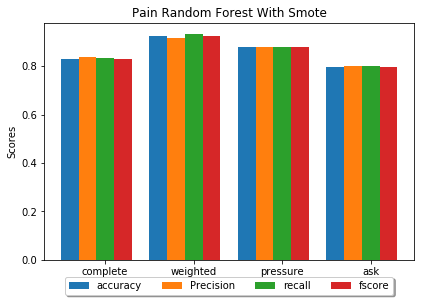

In [34]:
label='Pain'
asklabel='Pain'
res_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
wei_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
bld_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
ask_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
for estimators in range (100,1000,100):
    print (estimators)
    result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDataset(label,asklabel)
    res_acc,res_scores=randomForest(result,result_labels,estimators,"Result")
    wei_acc,wei_scores=randomForest(weighted,weighted_labels,estimators,"Weighted")
    blood_acc,blood_scores=randomForest(blood,blood_labels,estimators,"Blood")
    ask_acc,ask_scores=randomForest(ask,ask_labels,estimators,"Ask")
    print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
    print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
    print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
    print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
    res_Stats=res_Stats.append({'Estimators':estimators,'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
    wei_Stats=wei_Stats.append({'Estimators':estimators,'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
    bld_Stats=bld_Stats.append({'Estimators':estimators,'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
    ask_Stats=ask_Stats.append({'Estimators':estimators,'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
'''writer = pd.ExcelWriter('Forrest_Stats'+label+'.xlsx', engine='xlsxwriter')
res_Stats.to_excel(writer, sheet_name='Sheet1') 
wei_Stats.to_excel(writer, sheet_name='Sheet2') 
bld_Stats.to_excel(writer, sheet_name='Sheet3') 
ask_Stats.to_excel(writer, sheet_name='Sheet4')
writer.save()'''
x1=res_Stats['FScore'].tolist().index(max(res_Stats['FScore'].tolist()))
x2=wei_Stats['FScore'].tolist().index(max(wei_Stats['FScore'].tolist()))
x3=bld_Stats['FScore'].tolist().index(max(bld_Stats['FScore'].tolist()))
x4=ask_Stats['FScore'].tolist().index(max(ask_Stats['FScore'].tolist()))
max_res=res_Stats.iloc[x1].to_frame().transpose()
max_wei=wei_Stats.iloc[x2].to_frame().transpose()
max_bld=bld_Stats.iloc[x3].to_frame().transpose()
max_ask=ask_Stats.iloc[x4].to_frame().transpose()
stats=pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
max_res['Estimators']="Complete"
max_wei['Estimators']="Weighted"
max_bld['Estimators']="Pressure"
max_ask['Estimators']="Ask"
stats=stats.append(max_res)
stats=stats.append(max_wei)
stats=stats.append(max_bld)
stats=stats.append(max_ask)

plotResult(label+" Random Forest With Smote",max_res,max_wei,max_bld,max_ask,x1,x2,x3,x4)

import os.path
if not os.path.exists('Forrest_StatsTotal'+'.xlsx'):
    writer = pd.ExcelWriter('Forrest_StatsTotal'+'.xlsx', engine = 'xlsxwriter')

    writer.save()
    writer.close()
writer = pd.ExcelWriter('Forrest_StatsTotal'+'.xlsx', engine='openpyxl')
book = load_workbook('Forrest_StatsTotal'+'.xlsx')
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

stats.to_excel(writer, sheet_name=label)
writer.save()
writer.close()

### Random Forests with importance

100


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 2, 3, 4], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 2, 3, 4, 5, 6, 7, 9, 10], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 2, 3, 4, 6, 8], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 4], dtype='int64')
Counter({0: 1403, 1: 1403})
Counter({0: 107, 1: 107})
Counter({0: 399, 1: 399})
Counter({0: 643, 1: 643})
Res: Accuracy: 0.8004750593824228 # Scores: (0.8011535680390474, 0.8008544403810556, 0.8004570461278037, None)
Wei: Accuracy: 0.9230769230769231 # Scores: (0.9236242884250474, 0.9228219696969697, 0.9230040274816395, None)
Bld: Accuracy: 0.8833333333333333 # Scores: (0.883023061961656, 0.8838763575605681, 0.8832035595105674, None)
Ask: Accuracy: 0.8471502590673575 # Scores: (0.8664113243817901, 0.8392664509169363, 0.8424020981682547, None)
200


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 2, 3, 4], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 2, 3, 4, 5, 6, 7, 9], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 2, 3, 4, 6, 8], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 4], dtype='int64')
Counter({0: 1403, 1: 1403})
Counter({0: 107, 1: 107})
Counter({0: 399, 1: 399})
Counter({0: 643, 1: 643})
Res: Accuracy: 0.8040380047505938 # Scores: (0.8051215498668295, 0.8045171339563864, 0.8039912809768692, None)
Wei: Accuracy: 0.8769230769230769 # Scores: (0.8768939393939394, 0.8768939393939394, 0.8768939393939394, None)
Bld: Accuracy: 0.9 # Scores: (0.899610678531702, 0.9001670843776107, 0.8998260869565218, None)
Ask: Accuracy: 0.8471502590673575 # Scores: (0.8664113243817901, 0.8392664509169363, 0.8424020981682547, None)
300


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 2, 3, 4], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 2, 3, 4, 5, 6, 7, 9], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 2, 3, 4, 6, 8], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 4], dtype='int64')
Counter({0: 1403, 1: 1403})
Counter({0: 107, 1: 107})
Counter({0: 399, 1: 399})
Counter({0: 643, 1: 643})
Res: Accuracy: 0.8004750593824228 # Scores: (0.8011535680390474, 0.8008544403810556, 0.8004570461278037, None)
Wei: Accuracy: 0.8615384615384616 # Scores: (0.861954459203036, 0.8612689393939394, 0.8614072494669509, None)
Bld: Accuracy: 0.8916666666666667 # Scores: (0.8912680756395995, 0.8918128654970761, 0.8914782608695652, None)
Ask: Accuracy: 0.8471502590673575 # Scores: (0.8664113243817901, 0.8392664509169363, 0.8424020981682547, None)
400


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 2, 3, 4], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 2, 3, 4, 6, 7, 9, 10], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 2, 3, 4, 6, 8], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 4], dtype='int64')
Counter({0: 1403, 1: 1403})
Counter({0: 107, 1: 107})
Counter({0: 399, 1: 399})
Counter({0: 643, 1: 643})
Res: Accuracy: 0.8004750593824228 # Scores: (0.8013020480130204, 0.8008939455505892, 0.8004469122426869, None)
Wei: Accuracy: 0.9076923076923077 # Scores: (0.9076704545454546, 0.9076704545454546, 0.9076704545454546, None)
Bld: Accuracy: 0.9083333333333333 # Scores: (0.9079532814238043, 0.9085213032581454, 0.9081739130434783, None)
Ask: Accuracy: 0.8471502590673575 # Scores: (0.8664113243817901, 0.8392664509169363, 0.8424020981682547, None)
500


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 2, 3, 4], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 2, 3, 4, 5, 6, 7, 9, 10], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 2, 3, 4, 6, 8], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 4], dtype='int64')
Counter({0: 1403, 1: 1403})
Counter({0: 107, 1: 107})
Counter({0: 399, 1: 399})
Counter({0: 643, 1: 643})
Res: Accuracy: 0.7980997624703088 # Scores: (0.7989228717392287, 0.7985179917829247, 0.798071280245576, None)
Wei: Accuracy: 0.9230769230769231 # Scores: (0.9236242884250474, 0.9228219696969697, 0.9230040274816395, None)
Bld: Accuracy: 0.9083333333333333 # Scores: (0.9079532814238043, 0.9085213032581454, 0.9081739130434783, None)
Ask: Accuracy: 0.8471502590673575 # Scores: (0.8664113243817901, 0.8392664509169363, 0.8424020981682547, None)
600


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 2, 3, 4], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 2, 3, 4, 5, 6, 7, 9, 10], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 2, 3, 4, 6, 8], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 4], dtype='int64')
Counter({0: 1403, 1: 1403})
Counter({0: 107, 1: 107})
Counter({0: 399, 1: 399})
Counter({0: 643, 1: 643})
Res: Accuracy: 0.8016627078384798 # Scores: (0.802273433307916, 0.802022664680121, 0.8016489988221437, None)
Wei: Accuracy: 0.9230769230769231 # Scores: (0.9236242884250474, 0.9228219696969697, 0.9230040274816395, None)
Bld: Accuracy: 0.9083333333333333 # Scores: (0.9079532814238043, 0.9085213032581454, 0.9081739130434783, None)
Ask: Accuracy: 0.8471502590673575 # Scores: (0.8664113243817901, 0.8392664509169363, 0.8424020981682547, None)
700


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 2, 3, 4], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 2, 3, 4, 5, 6, 7, 9, 10], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 2, 3, 4, 6, 8], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 4], dtype='int64')
Counter({0: 1403, 1: 1403})
Counter({0: 107, 1: 107})
Counter({0: 399, 1: 399})
Counter({0: 643, 1: 643})
Res: Accuracy: 0.8028503562945368 # Scores: (0.8035318841234691, 0.80323039414872, 0.802832557483425, None)
Wei: Accuracy: 0.9230769230769231 # Scores: (0.9236242884250474, 0.9228219696969697, 0.9230040274816395, None)
Bld: Accuracy: 0.9083333333333333 # Scores: (0.9079532814238043, 0.9085213032581454, 0.9081739130434783, None)
Ask: Accuracy: 0.8471502590673575 # Scores: (0.8664113243817901, 0.8392664509169363, 0.8424020981682547, None)
800


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 2, 3, 4], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 2, 3, 4, 5, 6, 7, 9, 10], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 2, 3, 4, 6, 8], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 4], dtype='int64')
Counter({0: 1403, 1: 1403})
Counter({0: 107, 1: 107})
Counter({0: 399, 1: 399})
Counter({0: 643, 1: 643})
Res: Accuracy: 0.8040380047505938 # Scores: (0.804794191598158, 0.804438123617319, 0.804015613295847, None)
Wei: Accuracy: 0.9230769230769231 # Scores: (0.9236242884250474, 0.9228219696969697, 0.9230040274816395, None)
Bld: Accuracy: 0.9083333333333333 # Scores: (0.9079532814238043, 0.9085213032581454, 0.9081739130434783, None)
Ask: Accuracy: 0.8471502590673575 # Scores: (0.8664113243817901, 0.8392664509169363, 0.8424020981682547, None)
900


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 2, 3, 4], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 2, 3, 4, 5, 6, 7, 9], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 2, 3, 4, 6, 8], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 4], dtype='int64')
Counter({0: 1403, 1: 1403})
Counter({0: 107, 1: 107})
Counter({0: 399, 1: 399})
Counter({0: 643, 1: 643})
Res: Accuracy: 0.8016627078384798 # Scores: (0.8021451520917915, 0.8019831595105873, 0.8016557136791741, None)
Wei: Accuracy: 0.8615384615384616 # Scores: (0.861954459203036, 0.8612689393939394, 0.8614072494669509, None)
Bld: Accuracy: 0.9041666666666667 # Scores: (0.9037940379403794, 0.9045530492898914, 0.9040317112606269, None)
Ask: Accuracy: 0.8471502590673575 # Scores: (0.8664113243817901, 0.8392664509169363, 0.8424020981682547, None)


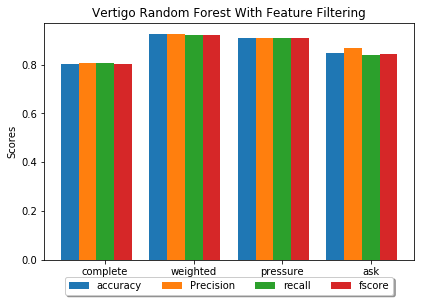

In [35]:
label='Vertigo'
asklabel='Vertigo'
res_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
wei_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
bld_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
ask_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
for estimators in range (100,1000,100):
    print (estimators)
    result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDataset(label,asklabel)
    res_feat=importance(result,result_labels)
    wei_feat=importance(weighted,weighted_labels)
    blood_feat=importance(blood,blood_labels)
    ask_feat=importance(ask,ask_labels)
    res_acc,res_scores=randomForest(pd.DataFrame(result)[res_feat],result_labels,estimators,"Result")
    wei_acc,wei_scores=randomForest(pd.DataFrame(weighted)[wei_feat],weighted_labels,estimators,"Weighted")
    blood_acc,blood_scores=randomForest(pd.DataFrame(blood)[blood_feat],blood_labels,estimators,"Blood")
    ask_acc,ask_scores=randomForest(pd.DataFrame(ask)[ask_feat],ask_labels,estimators,"Ask")
    print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
    print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
    print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
    print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
    res_Stats=res_Stats.append({'Estimators':estimators,'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
    wei_Stats=wei_Stats.append({'Estimators':estimators,'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
    bld_Stats=bld_Stats.append({'Estimators':estimators,'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
    ask_Stats=ask_Stats.append({'Estimators':estimators,'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
x1=res_Stats['FScore'].tolist().index(max(res_Stats['FScore'].tolist()))
x2=wei_Stats['FScore'].tolist().index(max(wei_Stats['FScore'].tolist()))
x3=bld_Stats['FScore'].tolist().index(max(bld_Stats['FScore'].tolist()))
x4=ask_Stats['FScore'].tolist().index(max(ask_Stats['FScore'].tolist()))
max_res=res_Stats.iloc[x1].to_frame().transpose()
max_wei=wei_Stats.iloc[x2].to_frame().transpose()
max_bld=bld_Stats.iloc[x3].to_frame().transpose()
max_ask=ask_Stats.iloc[x4].to_frame().transpose()
stats=pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
max_res['Estimators']="Complete"
max_wei['Estimators']="Weighted"
max_bld['Estimators']="Pressure"
max_ask['Estimators']="Ask"
stats=stats.append(max_res)
stats=stats.append(max_wei)
stats=stats.append(max_bld)
stats=stats.append(max_ask)

plotResult(label+" Random Forest With Feature Filtering",max_res,max_wei,max_bld,max_ask,x1,x2,x3,x4)

import os.path
if not os.path.exists('Forrest_StatsImportanceTotal'+'.xlsx'):
    writer = pd.ExcelWriter('Forrest_StatsImportanceTotal'+'.xlsx', engine = 'xlsxwriter')

    writer.save()
    writer.close()
writer = pd.ExcelWriter('Forrest_StatsImportanceTotal'+'.xlsx', engine='openpyxl')
book = load_workbook('Forrest_StatsImportanceTotal'+'.xlsx')
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

stats.to_excel(writer, sheet_name=label)
writer.save()
writer.close()

In [20]:
label='Hypertensive disease '
asklabel='Hypertensive disease '
res_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
wei_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
bld_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
ask_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
for estimators in range (100,1000,100):
    print (estimators)
    result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDatasetNoSmote(label,asklabel)
    res_acc,res_scores=randomForest(result,result_labels,estimators,"Result")
    wei_acc,wei_scores=randomForest(weighted,weighted_labels,estimators,"Weighted")
    blood_acc,blood_scores=randomForest(blood,blood_labels,estimators,"Blood")
    ask_acc,ask_scores=randomForest(ask,ask_labels,estimators,"Ask")
    print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
    print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
    print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
    print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
    res_Stats=res_Stats.append({'Estimators':estimators,'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
    wei_Stats=wei_Stats.append({'Estimators':estimators,'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
    bld_Stats=bld_Stats.append({'Estimators':estimators,'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
    ask_Stats=ask_Stats.append({'Estimators':estimators,'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
writer = pd.ExcelWriter('Forrest_Stats'+label+'smoteless.xlsx', engine='xlsxwriter')
res_Stats.to_excel(writer, sheet_name='Sheet1') 
wei_Stats.to_excel(writer, sheet_name='Sheet2') 
bld_Stats.to_excel(writer, sheet_name='Sheet3') 
ask_Stats.to_excel(writer, sheet_name='Sheet4')
writer.save()

100
Counter({0: 834, 1: 723})
Counter({1: 80, 0: 50})
Counter({1: 274, 0: 188})
Counter({0: 608, 1: 148})
Res: Accuracy: 0.7008547008547008 # Scores: (0.7007251153592617, 0.7003289473684211, 0.7004115226337448, None)
Wei: Accuracy: 0.717948717948718 # Scores: (0.6370967741935484, 0.6103896103896104, 0.6173059768064229, None)
Bld: Accuracy: 0.8273381294964028 # Scores: (0.8401511203751955, 0.7885720601237842, 0.8028368794326242, None)
Ask: Accuracy: 0.7444933920704846 # Scores: (0.5572548028311426, 0.5644381223328592, 0.5599598930481284, None)
200
Counter({0: 834, 1: 723})
Counter({1: 80, 0: 50})
Counter({1: 274, 0: 188})
Counter({0: 608, 1: 148})
Res: Accuracy: 0.7029914529914529 # Scores: (0.7027983539094651, 0.7026315789473685, 0.7026860269014027, None)
Wei: Accuracy: 0.6923076923076923 # Scores: (0.6201298701298701, 0.6201298701298701, 0.6201298701298701, None)
Bld: Accuracy: 0.8057553956834532 # Scores: (0.8159777424483307, 0.7635941644562334, 0.7768860353130016, None)
Ask: Accurac

In [26]:
label='Hypertensive disease '
asklabel='Hypertensive disease '
res_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
wei_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
bld_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
ask_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
for estimators in range (100,1000,100):
    print (estimators)
    result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDatasetNoSmote(label,asklabel)
    res_feat=importance(result,result_labels)
    wei_feat=importance(weighted,weighted_labels)
    blood_feat=importance(blood,blood_labels)
    ask_feat=importance(ask,ask_labels)
    res_acc,res_scores=randomForest(pd.DataFrame(result)[res_feat],result_labels,estimators,"Result")
    wei_acc,wei_scores=randomForest(pd.DataFrame(weighted)[wei_feat],weighted_labels,estimators,"Weighted")
    blood_acc,blood_scores=randomForest(pd.DataFrame(blood)[blood_feat],blood_labels,estimators,"Blood")
    ask_acc,ask_scores=randomForest(pd.DataFrame(ask)[ask_feat],ask_labels,estimators,"Ask")
    print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
    print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
    print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
    print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
    res_Stats=res_Stats.append({'Estimators':estimators,'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
    wei_Stats=wei_Stats.append({'Estimators':estimators,'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
    bld_Stats=bld_Stats.append({'Estimators':estimators,'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
    ask_Stats=ask_Stats.append({'Estimators':estimators,'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)

writer = pd.ExcelWriter('Forrest_Stats'+label+'importancesmoteless.xlsx', engine='xlsxwriter')
res_Stats.to_excel(writer, sheet_name='Sheet1') 
wei_Stats.to_excel(writer, sheet_name='Sheet2') 
bld_Stats.to_excel(writer, sheet_name='Sheet3') 
ask_Stats.to_excel(writer, sheet_name='Sheet4')
writer.save()

100


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({0: 834, 1: 723})
Counter({1: 80, 0: 50})
Counter({1: 274, 0: 188})
Counter({0: 608, 1: 148})
Res: Accuracy: 0.6837606837606838 # Scores: (0.6870343893445707, 0.681688596491228, 0.6806756781677024, None)
Wei: Accuracy: 0.7435897435897436 # Scores: (0.6834415584415584, 0.6834415584415584, 0.6834415584415584, None)
Bld: Accuracy: 0.7769784172661871 # Scores: (0.7679263565891472, 0.74447391688771, 0.7521426517112453, None)
Ask: Accuracy: 0.7929515418502202 # Scores: (0.6177283304246655, 0.615149359886202, 0.6164024017545752, None)
200


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({0: 834, 1: 723})


KeyboardInterrupt: 

### Random Forest Classifier Function 10-Fold

In [22]:
def average(scores):
    FScore=0
    Recall=0
    Precision=0

    for i in scores:
        Precision+=i[0]
        Recall+=i[1]
        FScore+=i[2]
    return (Precision/10,Recall/10,FScore/10)

In [23]:
def randomForest10Fold(result,result_labels,estimators,DataSet):
    from sklearn.model_selection import KFold
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import f1_score
    from collections import Counter
    kf = KFold(n_splits=10)

    accuracy=[]

    scores_rf=[]
    print(Counter(result_labels))
    count = 1
    for train_index, test_index in kf.split(result):
        X_train, X_test, Y_train, Y_test = result[train_index], result[test_index], result_labels[train_index],result_labels[test_index]
        clf = RandomForestClassifier(n_estimators=estimators, max_depth=2,random_state=0)
        clf.fit(X_train, Y_train)
        pred=clf.predict(X_test)
        accuracy.append(accuracy_score(Y_test, pred))
        scores_rf.append(precision_recall_fscore_support(Y_test,pred, average='macro'))
        
        #print(str(count)+DataSet)
        #print(f1_score(Y_test, pred, average='micro'))
        count+=1
        #print (pred)
        #print(classification_report(Y_test,pred,labels=[0,1]))
    accuracy = np.mean(accuracy,axis=0)   
    return accuracy,average(scores_rf)

In [24]:
def randomForest10FoldNotSmote(result,result_labels,estimators,DataSet):
    from sklearn.model_selection import KFold
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import f1_score
    from collections import Counter
    kf = KFold(n_splits=10)

    accuracy=[]

    scores_rf=[]
    print(Counter(result_labels))
    count = 1
    for train_index, test_index in kf.split(result):
        X_train, X_test, Y_train, Y_test = result.iloc[train_index], result.iloc[test_index], result_labels.iloc[train_index],result_labels.iloc[test_index]
        clf = RandomForestClassifier(n_estimators=estimators, max_depth=2,random_state=0)
        clf.fit(X_train, Y_train)
        pred=clf.predict(X_test)
        accuracy.append(accuracy_score(Y_test, pred))
        scores_rf.append(precision_recall_fscore_support(Y_test,pred, average='macro'))
        
        #print(str(count)+DataSet)
        #print(f1_score(Y_test, pred, average='micro'))
        count+=1
        #print (pred)
        #print(classification_report(Y_test,pred,labels=[0,1]))
    accuracy = np.mean(accuracy,axis=0)   
    return accuracy,average(scores_rf)

### Random Forest with 10-Fold Cross Validation

In [25]:
label='ADRCount'
asklabel='ADRCount'

res_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
wei_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
bld_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
ask_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
for estimators in range (100,1000,100):
    result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDataset(label,asklabel)
    res_acc,res_scores=randomForest10Fold(result,result_labels,estimators,"Result")
    wei_acc,wei_scores=randomForest10Fold(weighted,weighted_labels,estimators,"Weighted")
    blood_acc,blood_scores=randomForest10Fold(blood,blood_labels,estimators,"Blood")
    ask_acc,ask_scores=randomForest10Fold(ask,ask_labels,1000,"Ask")
    print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
    print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
    print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
    print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
    res_Stats=res_Stats.append({'Estimators':estimators,'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
    wei_Stats=wei_Stats.append({'Estimators':estimators,'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
    bld_Stats=bld_Stats.append({'Estimators':estimators,'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
    ask_Stats=ask_Stats.append({'Estimators':estimators,'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
res_Stats.to_excel('ForrestFoldresult_Stats'+label+'.xlsx') 
wei_Stats.to_excel('ForrestFoldweight_Stats'+label+'.xlsx') 
bld_Stats.to_excel('ForrestFoldblood_Stats'+label+'.xlsx') 
ask_Stats.to_excel('ForrestFoldask_Stats'+asklabel+'.xlsx') 


Counter({0: 997, 1: 997})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Counter({0: 93, 1: 93})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Counter({1: 325, 0: 325})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Counter({0: 562, 1: 562})
Res: Accuracy: 0.8055201005025123 # Scores: (0.7428154281209286, 0.7443423105940068, 0.7115928683933681)
Wei: Accuracy: 0.775438596491228 # Scores: (0.6733820346320345, 0.6771764346764347, 0.6546866670441457)
Bld: Accuracy: 0.7892307692307692 # Scores: (0.7012252754673653, 0.7383487606529205, 0.6910037378794464)
Ask: Accuracy: 0.9039902022756005 # Scores: (0.8845130565473553, 0.9217322844668475, 0.8819805552784356)
Counter({0: 997, 1: 997})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Counter({0: 93, 1: 93})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Counter({1: 325, 0: 325})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Counter({0: 562, 1: 562})
Res: Accuracy: 0.7999798994974875 # Scores: (0.7429409044698072, 0.7422556441670094, 0.7102791146027869)
Wei: Accuracy: 0.775438596491228 # Scores: (0.6708044733044732, 0.673009768009768, 0.6529434837568449)
Bld: Accuracy: 0.8015384615384615 # Scores: (0.719288099248086, 0.7547945098030835, 0.7080904675107481)
Ask: Accuracy: 0.9039902022756005 # Scores: (0.8845130565473553, 0.9217322844668475, 0.8819805552784356)
Counter({0: 997, 1: 997})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Counter({0: 93, 1: 93})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Counter({1: 325, 0: 325})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Counter({0: 562, 1: 562})
Res: Accuracy: 0.8090050251256281 # Scores: (0.7488003037048016, 0.7503452351741823, 0.7187804371092665)
Wei: Accuracy: 0.7862573099415203 # Scores: (0.6772709235209236, 0.6841208791208792, 0.6613697214975987)
Bld: Accuracy: 0.8076923076923078 # Scores: (0.7189608257596062, 0.755184304937656, 0.7079329969710683)
Ask: Accuracy: 0.9039902022756005 # Scores: (0.8845130565473553, 0.9217322844668475, 0.8819805552784356)
Counter({0: 997, 1: 997})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Counter({0: 93, 1: 93})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Counter({1: 325, 0: 325})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Counter({0: 562, 1: 562})
Res: Accuracy: 0.8165251256281406 # Scores: (0.7529970915285316, 0.7566557666621108, 0.7252567677693073)
Wei: Accuracy: 0.7812865497076023 # Scores: (0.6693939393939394, 0.6794810744810745, 0.653285287815339)
Bld: Accuracy: 0.8092307692307692 # Scores: (0.7181126370693468, 0.7601278871520376, 0.7055870985558003)
Ask: Accuracy: 0.9039902022756005 # Scores: (0.8845130565473553, 0.9217322844668475, 0.8819805552784356)
Counter({0: 997, 1: 997})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Counter({0: 93, 1: 93})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Counter({1: 325, 0: 325})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Counter({0: 562, 1: 562})
Res: Accuracy: 0.8145150753768844 # Scores: (0.7530652500194186, 0.7555626489261876, 0.7246436826314789)
Wei: Accuracy: 0.7812865497076023 # Scores: (0.6693939393939394, 0.6794810744810745, 0.653285287815339)
Bld: Accuracy: 0.8046153846153847 # Scores: (0.7191138910574472, 0.757556812508704, 0.7071154315349972)
Ask: Accuracy: 0.9039902022756005 # Scores: (0.8845130565473553, 0.9217322844668475, 0.8819805552784356)
Counter({0: 997, 1: 997})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Counter({0: 93, 1: 93})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Counter({1: 325, 0: 325})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Counter({0: 562, 1: 562})
Res: Accuracy: 0.8130075376884423 # Scores: (0.7508242169119981, 0.7534232053492602, 0.7237976985627668)
Wei: Accuracy: 0.7757309941520467 # Scores: (0.6693939393939394, 0.6767032967032968, 0.6515807423607936)
Bld: Accuracy: 0.8092307692307694 # Scores: (0.7190153695627406, 0.75747574068592, 0.7088111508009108)
Ask: Accuracy: 0.9039902022756005 # Scores: (0.8845130565473553, 0.9217322844668475, 0.8819805552784356)
Counter({0: 997, 1: 997})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Counter({0: 93, 1: 93})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Counter({1: 325, 0: 325})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Counter({0: 562, 1: 562})
Res: Accuracy: 0.8150150753768844 # Scores: (0.7505385800984646, 0.7542809173286138, 0.7250290136370507)
Wei: Accuracy: 0.7809941520467836 # Scores: (0.673320707070707, 0.6805494505494506, 0.6564979266258038)
Bld: Accuracy: 0.803076923076923 # Scores: (0.7132391031462303, 0.752498213955328, 0.7030670432609399)
Ask: Accuracy: 0.9039902022756005 # Scores: (0.8845130565473553, 0.9217322844668475, 0.8819805552784356)
Counter({0: 997, 1: 997})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Counter({0: 93, 1: 93})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Counter({1: 325, 0: 325})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Counter({0: 562, 1: 562})
Res: Accuracy: 0.8165201005025124 # Scores: (0.7527065672365418, 0.7560981097715596, 0.7258035358826243)
Wei: Accuracy: 0.7865497076023392 # Scores: (0.673320707070707, 0.6833272283272284, 0.6582024720803492)
Bld: Accuracy: 0.8061538461538461 # Scores: (0.713631029452056, 0.7539893941699125, 0.7040383797616977)
Ask: Accuracy: 0.9039902022756005 # Scores: (0.8845130565473553, 0.9217322844668475, 0.8819805552784356)
Counter({0: 997, 1: 997})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Counter({0: 93, 1: 93})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Counter({1: 325, 0: 325})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Counter({0: 562, 1: 562})
Res: Accuracy: 0.8170251256281407 # Scores: (0.7516516495523513, 0.7557980253895977, 0.7259090743443609)
Wei: Accuracy: 0.7918128654970761 # Scores: (0.6772709235209236, 0.6868986568986569, 0.6630742669521441)
Bld: Accuracy: 0.8046153846153846 # Scores: (0.7143991406103474, 0.7536492530448877, 0.7046285689192118)
Ask: Accuracy: 0.9039902022756005 # Scores: (0.8845130565473553, 0.9217322844668475, 0.8819805552784356)


In [26]:
label='ADRCount'
asklabel='ADRCount'

res_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
wei_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
bld_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
ask_Stats = pd.DataFrame(columns = ['Estimators' , 'Accuracy', 'Precision' , 'Recall','FScore'])
for estimators in range (100,1000,100):
    result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDatasetNoSmote(label,asklabel)
    res_acc,res_scores=randomForest10FoldNotSmote(result,result_labels,estimators,"Result")
    wei_acc,wei_scores=randomForest10FoldNotSmote(weighted,weighted_labels,estimators,"Weighted")
    blood_acc,blood_scores=randomForest10FoldNotSmote(blood,blood_labels,estimators,"Blood")
    ask_acc,ask_scores=randomForest10FoldNotSmote(ask,ask_labels,1000,"Ask")
    print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
    print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
    print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
    print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
    res_Stats=res_Stats.append({'Estimators':estimators,'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
    wei_Stats=wei_Stats.append({'Estimators':estimators,'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
    bld_Stats=bld_Stats.append({'Estimators':estimators,'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
    ask_Stats=ask_Stats.append({'Estimators':estimators,'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
res_Stats.to_excel('ForrestFoldresult_Stats'+label+'smoteless.xlsx') 
wei_Stats.to_excel('ForrestFoldweight_Stats'+label+'smoteless.xlsx') 
bld_Stats.to_excel('ForrestFoldblood_Stats'+label+'smoteless.xlsx') 
ask_Stats.to_excel('ForrestFoldask_Stats'+asklabel+'smoteless.xlsx') 


Counter({1: 997, 0: 560})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({1: 93, 0: 37})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({1: 325, 0: 137})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({1: 562, 0: 194})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Res: Accuracy: 0.6423159636062862 # Scores: (0.3569986842567488, 0.5055481874447392, 0.40097391324841175)
Wei: Accuracy: 0.7461538461538462 # Scores: (0.5682692307692307, 0.5425, 0.4926513269339356)
Bld: Accuracy: 0.7031914893617021 # Scores: (0.35159574468085114, 0.5, 0.41193330712998666)
Ask: Accuracy: 0.7431929824561403 # Scores: (0.37159649122807015, 0.5, 0.4245288434175614)
Counter({1: 997, 0: 560})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({1: 93, 0: 37})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({1: 325, 0: 137})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({1: 562, 0: 194})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Res: Accuracy: 0.6416708023159636 # Scores: (0.3543592519193299, 0.5042661361626879, 0.39883028666261955)
Wei: Accuracy: 0.7615384615384616 # Scores: (0.6245629370629371, 0.5675, 0.5300755693581781)
Bld: Accuracy: 0.7031914893617021 # Scores: (0.35159574468085114, 0.5, 0.41193330712998666)
Ask: Accuracy: 0.7431929824561403 # Scores: (0.37159649122807015, 0.5, 0.4245288434175614)
Counter({1: 997, 0: 560})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({1: 93, 0: 37})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({1: 325, 0: 137})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({1: 562, 0: 194})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Res: Accuracy: 0.6403804797353184 # Scores: (0.3201902398676592, 0.5, 0.3897269578934828)
Wei: Accuracy: 0.7461538461538462 # Scores: (0.5682692307692307, 0.5425, 0.4926513269339356)
Bld: Accuracy: 0.7031914893617021 # Scores: (0.35159574468085114, 0.5, 0.41193330712998666)
Ask: Accuracy: 0.7431929824561403 # Scores: (0.37159649122807015, 0.5, 0.4245288434175614)
Counter({1: 997, 0: 560})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({1: 93, 0: 37})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({1: 325, 0: 137})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({1: 562, 0: 194})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Res: Accuracy: 0.6403804797353184 # Scores: (0.3201902398676592, 0.5, 0.3897269578934828)
Wei: Accuracy: 0.7461538461538462 # Scores: (0.5682692307692307, 0.5425, 0.4926513269339356)
Bld: Accuracy: 0.7031914893617021 # Scores: (0.35159574468085114, 0.5, 0.41193330712998666)
Ask: Accuracy: 0.7431929824561403 # Scores: (0.37159649122807015, 0.5, 0.4245288434175614)
Counter({1: 997, 0: 560})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({1: 93, 0: 37})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({1: 325, 0: 137})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({1: 562, 0: 194})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Res: Accuracy: 0.6403804797353184 # Scores: (0.3201902398676592, 0.5, 0.3897269578934828)
Wei: Accuracy: 0.7461538461538462 # Scores: (0.5682692307692307, 0.5425, 0.4926513269339356)
Bld: Accuracy: 0.7031914893617021 # Scores: (0.35159574468085114, 0.5, 0.41193330712998666)
Ask: Accuracy: 0.7431929824561403 # Scores: (0.37159649122807015, 0.5, 0.4245288434175614)
Counter({1: 997, 0: 560})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({1: 93, 0: 37})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({1: 325, 0: 137})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({1: 562, 0: 194})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Res: Accuracy: 0.6403804797353184 # Scores: (0.3201902398676592, 0.5, 0.3897269578934828)
Wei: Accuracy: 0.7461538461538462 # Scores: (0.5682692307692307, 0.5425, 0.4926513269339356)
Bld: Accuracy: 0.7031914893617021 # Scores: (0.35159574468085114, 0.5, 0.41193330712998666)
Ask: Accuracy: 0.7431929824561403 # Scores: (0.37159649122807015, 0.5, 0.4245288434175614)
Counter({1: 997, 0: 560})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({1: 93, 0: 37})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({1: 325, 0: 137})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({1: 562, 0: 194})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Res: Accuracy: 0.6403804797353184 # Scores: (0.3201902398676592, 0.5, 0.3897269578934828)
Wei: Accuracy: 0.7461538461538462 # Scores: (0.5682692307692307, 0.5425, 0.4926513269339356)
Bld: Accuracy: 0.7031914893617021 # Scores: (0.35159574468085114, 0.5, 0.41193330712998666)
Ask: Accuracy: 0.7431929824561403 # Scores: (0.37159649122807015, 0.5, 0.4245288434175614)
Counter({1: 997, 0: 560})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({1: 93, 0: 37})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({1: 325, 0: 137})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({1: 562, 0: 194})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Res: Accuracy: 0.6403804797353184 # Scores: (0.3201902398676592, 0.5, 0.3897269578934828)
Wei: Accuracy: 0.7461538461538462 # Scores: (0.5682692307692307, 0.5425, 0.4926513269339356)
Bld: Accuracy: 0.7031914893617021 # Scores: (0.35159574468085114, 0.5, 0.41193330712998666)
Ask: Accuracy: 0.7431929824561403 # Scores: (0.37159649122807015, 0.5, 0.4245288434175614)
Counter({1: 997, 0: 560})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({1: 93, 0: 37})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({1: 325, 0: 137})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Counter({1: 562, 0: 194})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Res: Accuracy: 0.6403804797353184 # Scores: (0.3201902398676592, 0.5, 0.3897269578934828)
Wei: Accuracy: 0.7461538461538462 # Scores: (0.5682692307692307, 0.5425, 0.4926513269339356)
Bld: Accuracy: 0.7031914893617021 # Scores: (0.35159574468085114, 0.5, 0.41193330712998666)
Ask: Accuracy: 0.7431929824561403 # Scores: (0.37159649122807015, 0.5, 0.4245288434175614)


In [27]:
#ask_scores[9]

### SVM Classifier Function

In [24]:
def SVM(result,result_labels,DataSet):
    from sklearn.model_selection import KFold
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report
    from sklearn.metrics import f1_score
    from collections import Counter
    
    X_train, X_test, Y_train, Y_test = train_test_split(result, result_labels, test_size=0.30, random_state=42)
    print(Counter(result_labels))
    clf = SVC(gamma='auto')
    clf.fit(X_train, Y_train)
    pred=clf.predict(X_test)
    accuracy=(accuracy_score(Y_test, pred))
    #print (accuracy)
    scores_rf=(precision_recall_fscore_support(Y_test,pred, average='macro'))
    #print(DataSet)
    #print (pred)
    #print(classification_report(Y_test,pred,labels=[0,1,2]))
        
    return accuracy,scores_rf

### SVM  

Counter({0: 1168, 1: 1168})
Counter({0: 89, 1: 89})
Counter({0: 334, 1: 334})
Counter({0: 590, 1: 590})
Res: Accuracy: 0.7646219686162625 # Scores: (0.8020652566883586, 0.7726468044836757, 0.760312082310155, None)
Wei: Accuracy: 0.7407407407407407 # Scores: (0.7941176470588236, 0.7941176470588236, 0.7407407407407407, None)
Bld: Accuracy: 0.7562189054726368 # Scores: (0.7579443892750745, 0.7574841395717684, 0.756194766938139, None)
Ask: Accuracy: 0.7288135593220338 # Scores: (0.7403568617160851, 0.7348115867726224, 0.728110599078341, None)


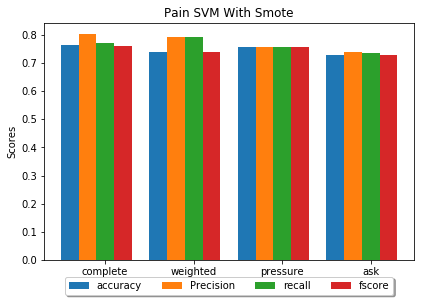

In [38]:
label='Pain'
asklabel='Pain'
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])


result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDataset(label,asklabel)
res_acc,res_scores=SVM(result,result_labels,"Result")
wei_acc,wei_scores=SVM(weighted,weighted_labels,"Weighted")
blood_acc,blood_scores=SVM(blood,blood_labels,"Blood")
ask_acc,ask_scores=SVM(ask,ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
#Stats.to_excel('SVMresult_Stats'+label+'.xlsx') 

plotResult(label+" SVM With Smote",Stats,Stats,Stats,Stats,0,1,2,3)

import os.path
if not os.path.exists('SVM'+'.xlsx'):
    writer = pd.ExcelWriter('SVM'+'.xlsx', engine = 'xlsxwriter')

    writer.save()
    writer.close()
writer = pd.ExcelWriter('SVM'+'.xlsx', engine='openpyxl')
book = load_workbook('SVM'+'.xlsx')
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

Stats.to_excel(writer, sheet_name=label)
writer.save()
writer.close()



C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 2, 3, 6], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 2, 3, 4, 5, 7, 8, 17], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 2, 3, 5, 8], dtype='int64')


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Int64Index([0, 6], dtype='int64')
Counter({1: 834, 0: 834})
Counter({1: 80, 0: 80})
Counter({1: 274, 0: 274})
Counter({0: 608, 1: 608})
Res: Accuracy: 0.688622754491018 # Scores: (0.688735650510204, 0.6886454183266932, 0.6885917378554124, None)
Wei: Accuracy: 0.75 # Scores: (0.78125, 0.75, 0.7428571428571429, None)
Bld: Accuracy: 0.7272727272727273 # Scores: (0.7319230769230769, 0.7221485411140584, 0.7223364870423694, None)
Ask: Accuracy: 0.7315068493150685 # Scores: (0.7546895724120508, 0.7443939393939394, 0.7304364864050159, None)


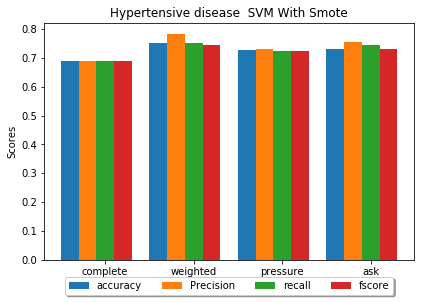

In [36]:
label='Hypertensive disease '
asklabel='Hypertensive disease '
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])


result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDataset(label,asklabel)
res_feat=importance(result,result_labels)
wei_feat=importance(weighted,weighted_labels)
blood_feat=importance(blood,blood_labels)
ask_feat=importance(ask,ask_labels)
res_acc,res_scores=SVM(pd.DataFrame(result)[res_feat],result_labels,"Result")
wei_acc,wei_scores=SVM(pd.DataFrame(weighted)[wei_feat],weighted_labels,"Weighted")
blood_acc,blood_scores=SVM(pd.DataFrame(blood)[blood_feat],blood_labels,"Blood")
ask_acc,ask_scores=SVM(pd.DataFrame(ask)[ask_feat],ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
#Stats.to_excel('SVMresult_Stats'+label+'.xlsx') 

plotResult(label+" SVM With Smote",Stats,Stats,Stats,Stats,0,1,2,3)

import os.path
if not os.path.exists('SVM'+'.xlsx'):
    writer = pd.ExcelWriter('SVM'+'.xlsx', engine = 'xlsxwriter')

    writer.save()
    writer.close()
writer = pd.ExcelWriter('SVM'+'.xlsx', engine='openpyxl')
book = load_workbook('SVM'+'.xlsx')
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

Stats.to_excel(writer, sheet_name=label)
writer.save()
writer.close()

In [31]:
label='Hypertensive disease '
asklabel='Hypertensive disease '
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])


result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDatasetNoSmote(label,asklabel)
res_acc,res_scores=SVM(result,result_labels,"Result")
wei_acc,wei_scores=SVM(weighted,weighted_labels,"Weighted")
blood_acc,blood_scores=SVM(blood,blood_labels,"Blood")
ask_acc,ask_scores=SVM(ask,ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
Stats.to_excel('SVMresult_Stats'+label+'smoteless.xlsx') 


Counter({0: 834, 1: 723})
Counter({1: 80, 0: 50})
Counter({1: 274, 0: 188})
Counter({0: 608, 1: 148})
Res: Accuracy: 0.7008547008547008 # Scores: (0.7057175312381674, 0.6985745614035088, 0.697400750032329, None)
Wei: Accuracy: 0.7692307692307693 # Scores: (0.8783783783783784, 0.5909090909090909, 0.5846153846153846, None)
Bld: Accuracy: 0.7050359712230215 # Scores: (0.6891483516483516, 0.6521883289124668, 0.6570379731600168, None)
Ask: Accuracy: 0.8414096916299559 # Scores: (0.9203539823008849, 0.5135135135135135, 0.48304655870445345, None)


In [32]:
label='Hypertensive disease '
asklabel='Hypertensive disease '
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])


result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDatasetNoSmote(label,asklabel)
res_feat=importance(result,result_labels)
wei_feat=importance(weighted,weighted_labels)
blood_feat=importance(blood,blood_labels)
ask_feat=importance(ask,ask_labels)
res_acc,res_scores=SVM(pd.DataFrame(result)[res_feat],result_labels,"Result")
wei_acc,wei_scores=SVM(pd.DataFrame(weighted)[wei_feat],weighted_labels,"Weighted")
blood_acc,blood_scores=SVM(pd.DataFrame(blood)[blood_feat],blood_labels,"Blood")
ask_acc,ask_scores=SVM(pd.DataFrame(ask)[ask_feat],ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
Stats.to_excel('SVMresult_Stats'+label+'importancesmoteless.xlsx') 


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({0: 834, 1: 723})
Counter({1: 80, 0: 50})
Counter({1: 274, 0: 188})
Counter({0: 608, 1: 148})
Res: Accuracy: 0.6538461538461539 # Scores: (0.6583358848744643, 0.6512061403508772, 0.6488179055806715, None)
Wei: Accuracy: 0.7692307692307693 # Scores: (0.8783783783783784, 0.5909090909090909, 0.5846153846153846, None)
Bld: Accuracy: 0.697841726618705 # Scores: (0.7097902097902098, 0.6193633952254642, 0.6132750397456279, None)
Ask: Accuracy: 0.8281938325991189 # Scores: (0.5874811463046757, 0.5165007112375534, 0.49906637243252416, None)


### SVM 10-Fold Function

In [33]:
def SVM10Fold(result,result_labels,DataSet):
    from sklearn.model_selection import KFold
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import f1_score
    from collections import Counter
    kf = KFold(n_splits=10)

    accuracy=[]

    scores_rf=[]
    print(Counter(result_labels))
    count = 1
    for train_index, test_index in kf.split(result):
        X_train, X_test, Y_train, Y_test = result[train_index], result[test_index], result_labels[train_index],result_labels[test_index]
        clf = SVC(gamma='auto')
        clf.fit(X_train, Y_train)
        pred=clf.predict(X_test)
        accuracy.append(accuracy_score(Y_test, pred))
        scores_rf.append(precision_recall_fscore_support(Y_test,pred, average='macro'))
        
        #print(str(count)+DataSet)
        #print(f1_score(Y_test, pred, average='micro'))
        count+=1
        #print (pred)
        #print(classification_report(Y_test,pred,labels=[0,1]))
    accuracy = np.mean(accuracy,axis=0)   
    return accuracy,average(scores_rf)

In [34]:
def SVM10FoldNoSmote(result,result_labels,DataSet):
    from sklearn.model_selection import KFold
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import f1_score
    from collections import Counter
    kf = KFold(n_splits=10)
    accuracy=[]

    scores_rf=[]
    print(Counter(result_labels))
    count = 1
    for train_index, test_index in kf.split(result):
        X_train, X_test, Y_train, Y_test = result.iloc[train_index], result.iloc[test_index], result_labels.iloc[train_index],result_labels.iloc[test_index]
        clf = SVC(gamma='auto')
        clf.fit(X_train, Y_train)
        pred=clf.predict(X_test)
        accuracy.append(accuracy_score(Y_test, pred))
        scores_rf.append(precision_recall_fscore_support(Y_test,pred, average='macro'))
        
        #print(str(count)+DataSet)
        #print(f1_score(Y_test, pred, average='micro'))
        count+=1
        #print (pred)
        #print(classification_report(Y_test,pred,labels=[0,1]))
    accuracy = np.mean(accuracy,axis=0)   
    return accuracy,average(scores_rf)

### SVM 10-Fold

In [35]:
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])

label='Hypertensive disease '
asklabel='Hypertensive disease '
result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDataset(label,asklabel)
res_acc,res_scores=SVM10Fold(result,result_labels,"Result")
wei_acc,wei_scores=SVM10Fold(weighted,weighted_labels,"Weighted")
blood_acc,blood_scores=SVM10Fold(blood,blood_labels,"Blood")
ask_acc,ask_scores=SVM10Fold(ask,ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
Stats.to_excel('SVMresult_Stats10Fold'+label+'.xlsx') 

Counter({1: 834, 0: 834})
Counter({1: 80, 0: 80})
Counter({1: 274, 0: 274})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Counter({0: 608, 1: 608})
Res: Accuracy: 0.663101507827718 # Scores: (0.6725628520390469, 0.6761496377396277, 0.6544962946953283)
Wei: Accuracy: 0.71875 # Scores: (0.6280934343434343, 0.5980259324009325, 0.5963648583247174)
Bld: Accuracy: 0.721010101010101 # Scores: (0.6759517266538593, 0.6614434322260432, 0.6522931172587427)
Ask: Accuracy: 0.7445874542744886 # Scores: (0.611755069769185, 0.647484170480776, 0.585458690933904)


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [36]:
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])

label='Hypertensive disease '
asklabel='Hypertensive disease '
result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDatasetNoSmote(label,asklabel)
res_acc,res_scores=SVM10FoldNoSmote(result,result_labels,"Result")
wei_acc,wei_scores=SVM10FoldNoSmote(weighted,weighted_labels,"Weighted")
blood_acc,blood_scores=SVM10FoldNoSmote(blood,blood_labels,"Blood")
ask_acc,ask_scores=SVM10FoldNoSmote(ask,ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
Stats.to_excel('SVMresult_Stats10Fold'+label+'smoteless.xlsx') 

Counter({0: 834, 1: 723})
Counter({1: 80, 0: 50})
Counter({1: 274, 0: 188})
Counter({0: 608, 1: 148})
Res: Accuracy: 0.6455004135649297 # Scores: (0.6500318744362645, 0.6541848478293254, 0.6292282548625472)
Wei: Accuracy: 0.6615384615384615 # Scores: (0.7013419913419913, 0.6378571428571428, 0.5933210253798489)
Bld: Accuracy: 0.7140610545790935 # Scores: (0.7208260334375953, 0.6703590938075548, 0.66206667853428)
Ask: Accuracy: 0.8039298245614035 # Scores: (0.40196491228070175, 0.5, 0.4449683813348536)


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [37]:
#result

### Naive Bayes Function

In [38]:
def NB(result,result_labels,DataSet):
    from sklearn.model_selection import KFold
    from sklearn.naive_bayes import GaussianNB
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report
    from sklearn.metrics import f1_score
    from collections import Counter
    
    X_train, X_test, Y_train, Y_test = train_test_split(result, result_labels, test_size=0.30, random_state=42)
    print(Counter(result_labels))
    clf = GaussianNB()
    clf.fit(X_train, Y_train)
    pred=clf.predict(X_test)
    accuracy=(accuracy_score(Y_test, pred))
    #print (accuracy)
    scores_rf=(precision_recall_fscore_support(Y_test,pred, average='macro'))
    #print(DataSet)
    #print (pred)
    #print(classification_report(Y_test,pred,labels=[0,1,2]))
        
    return accuracy,scores_rf

### Naive Bayes 

In [39]:
label='Hypertensive disease '
asklabel='Hypertensive disease '
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])


result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDataset(label,asklabel)
res_acc,res_scores=NB(result,result_labels,"Result")
wei_acc,wei_scores=NB(weighted,weighted_labels,"Weighted")
blood_acc,blood_scores=NB(blood,blood_labels,"Blood")
ask_acc,ask_scores=NB(ask,ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
Stats.to_excel('NBresult_Stats'+label+'.xlsx') 

Counter({1: 834, 0: 834})
Counter({1: 80, 0: 80})
Counter({1: 274, 0: 274})
Counter({0: 608, 1: 608})
Res: Accuracy: 0.6287425149700598 # Scores: (0.6315254512928932, 0.6288844621513944, 0.626921721862789, None)
Wei: Accuracy: 0.7291666666666666 # Scores: (0.7901098901098902, 0.7291666666666667, 0.7141548327989006, None)
Bld: Accuracy: 0.6181818181818182 # Scores: (0.6357142857142857, 0.6259946949602122, 0.6135831381733021, None)
Ask: Accuracy: 0.7835616438356164 # Scores: (0.8007984155474408, 0.7945454545454546, 0.7832427515804824, None)


In [40]:
label='Hypertensive disease '
asklabel='Hypertensive disease '
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])

result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDataset(label,asklabel)
res_feat=importance(result,result_labels)
wei_feat=importance(weighted,weighted_labels)
blood_feat=importance(blood,blood_labels)
ask_feat=importance(ask,ask_labels)
res_acc,res_scores=NB(pd.DataFrame(result)[res_feat],result_labels,"Result")
wei_acc,wei_scores=NB(pd.DataFrame(weighted)[wei_feat],weighted_labels,"Weighted")
blood_acc,blood_scores=NB(pd.DataFrame(blood)[blood_feat],blood_labels,"Blood")
ask_acc,ask_scores=NB(pd.DataFrame(ask)[ask_feat],ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
Stats.to_excel('NBresult_Stats'+label+'importance.xlsx') 

C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({1: 834, 0: 834})
Counter({1: 80, 0: 80})
Counter({1: 274, 0: 274})
Counter({0: 608, 1: 608})
Res: Accuracy: 0.7005988023952096 # Scores: (0.7024743560886202, 0.7006932270916335, 0.6999664633172571, None)
Wei: Accuracy: 0.6041666666666666 # Scores: (0.6043478260869566, 0.6041666666666667, 0.6039947894051236, None)
Bld: Accuracy: 0.7090909090909091 # Scores: (0.7106270238445687, 0.7108753315649867, 0.7090802233323539, None)
Ask: Accuracy: 0.7342465753424657 # Scores: (0.7854922456787593, 0.7532575757575758, 0.7299575162650924, None)


In [41]:
label='Hypertensive disease '
asklabel='Hypertensive disease '
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])


result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDatasetNoSmote(label,asklabel)
res_acc,res_scores=NB(result,result_labels,"Result")
wei_acc,wei_scores=NB(weighted,weighted_labels,"Weighted")
blood_acc,blood_scores=NB(blood,blood_labels,"Blood")
ask_acc,ask_scores=NB(ask,ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
Stats.to_excel('NBresult_Stats'+label+'smoteless.xlsx') 

Counter({0: 834, 1: 723})
Counter({1: 80, 0: 50})
Counter({1: 274, 0: 188})
Counter({0: 608, 1: 148})
Res: Accuracy: 0.5961538461538461 # Scores: (0.5965403562665068, 0.5941885964912281, 0.5927155519742143, None)
Wei: Accuracy: 0.7692307692307693 # Scores: (0.7607142857142857, 0.6185064935064934, 0.6285714285714286, None)
Bld: Accuracy: 0.6546762589928058 # Scores: (0.6555900621118013, 0.6661140583554377, 0.6494325346784363, None)
Ask: Accuracy: 0.7268722466960352 # Scores: (0.5522242604907132, 0.5647937411095305, 0.5552957532861476, None)


In [42]:
label='Hypertensive disease '
asklabel='Hypertensive disease '
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])


result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDatasetNoSmote(label,asklabel)
res_feat=importance(result,result_labels)
wei_feat=importance(weighted,weighted_labels)
blood_feat=importance(blood,blood_labels)
ask_feat=importance(ask,ask_labels)
res_acc,res_scores=NB(pd.DataFrame(result)[res_feat],result_labels,"Result")
wei_acc,wei_scores=NB(pd.DataFrame(weighted)[wei_feat],weighted_labels,"Weighted")
blood_acc,blood_scores=NB(pd.DataFrame(blood)[blood_feat],blood_labels,"Blood")
ask_acc,ask_scores=NB(pd.DataFrame(ask)[ask_feat],ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
Stats.to_excel('NBresult_Stats'+label+'importancesmoteless.xlsx') 


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:197: DataConversionWarning: A column-vector y was passed when 

Counter({0: 834, 1: 723})
Counter({1: 80, 0: 50})
Counter({1: 274, 0: 188})
Counter({0: 608, 1: 148})
Res: Accuracy: 0.6602564102564102 # Scores: (0.6664379192360481, 0.6573464912280702, 0.6543847507930685, None)
Wei: Accuracy: 0.6410256410256411 # Scores: (0.5568181818181819, 0.5568181818181819, 0.5568181818181819, None)
Bld: Accuracy: 0.7338129496402878 # Scores: (0.7273351648351649, 0.6829133510167993, 0.690497683095625, None)
Ask: Accuracy: 0.748898678414097 # Scores: (0.6051587301587301, 0.6432432432432433, 0.6146010186757216, None)


### Naive Bayes 10-Fold Function

In [43]:
def NB10Fold(result,result_labels,DataSet):
    from sklearn.model_selection import KFold
    from sklearn.naive_bayes import GaussianNB
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import f1_score
    from collections import Counter
    kf = KFold(n_splits=10)

    accuracy=[]

    scores_rf=[]
    print(Counter(result_labels))
    count = 1
    for train_index, test_index in kf.split(result):
        X_train, X_test, Y_train, Y_test = result[train_index], result[test_index], result_labels[train_index],result_labels[test_index]
        clf = GaussianNB()
        clf.fit(X_train, Y_train)
        pred=clf.predict(X_test)
        accuracy.append(accuracy_score(Y_test, pred))
        scores_rf.append(precision_recall_fscore_support(Y_test,pred, average='macro'))
        
        #print(str(count)+DataSet)
        #print(f1_score(Y_test, pred, average='micro'))
        count+=1
        #print (pred)
        #print(classification_report(Y_test,pred,labels=[0,1]))
    accuracy = np.mean(accuracy,axis=0)   
    return accuracy,average(scores_rf)

In [44]:
def NB10FoldNoSmote(result,result_labels,DataSet):
    from sklearn.model_selection import KFold
    from sklearn.naive_bayes import GaussianNB
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import f1_score
    from collections import Counter
    kf = KFold(n_splits=10)

    accuracy=[]

    scores_rf=[]
    print(Counter(result_labels))
    count = 1
    for train_index, test_index in kf.split(result):
        X_train, X_test, Y_train, Y_test = result.iloc[train_index], result.iloc[test_index], result_labels.iloc[train_index],result_labels.iloc[test_index]
        clf = GaussianNB()
        clf.fit(X_train, Y_train)
        pred=clf.predict(X_test)
        accuracy.append(accuracy_score(Y_test, pred))
        scores_rf.append(precision_recall_fscore_support(Y_test,pred, average='macro'))
        
        #print(str(count)+DataSet)
        #print(f1_score(Y_test, pred, average='micro'))
        count+=1
        #print (pred)
        #print(classification_report(Y_test,pred,labels=[0,1]))
    accuracy = np.mean(accuracy,axis=0)   
    return accuracy,average(scores_rf)

### Naive Bayes 10-Fold

In [45]:
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])

label='Hypertensive disease '
asklabel='Hypertensive disease '
result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDataset(label,asklabel)
res_acc,res_scores=NB10Fold(result,result_labels,"Result")
wei_acc,wei_scores=NB10Fold(weighted,weighted_labels,"Weighted")
blood_acc,blood_scores=NB10Fold(blood,blood_labels,"Blood")
ask_acc,ask_scores=NB10Fold(ask,ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
Stats.to_excel('NBresult_Stats10Fold'+label+'.xlsx') 

Counter({1: 834, 0: 834})
Counter({1: 80, 0: 80})
Counter({1: 274, 0: 274})
Counter({0: 608, 1: 608})
Res: Accuracy: 0.6234579034701682 # Scores: (0.6318923229476339, 0.6370319013726595, 0.616576877324976)
Wei: Accuracy: 0.64375 # Scores: (0.6608391608391608, 0.6215792540792541, 0.6038139775601076)
Bld: Accuracy: 0.6396296296296295 # Scores: (0.6491948105664025, 0.6535476874467434, 0.6193045413380015)
Ask: Accuracy: 0.7949193876168541 # Scores: (0.631730492224762, 0.6596810810067578, 0.6086214410048887)


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [46]:
Stats = pd.DataFrame(columns = ['Dataset','Accuracy', 'Precision' , 'Recall','FScore'])

label='Hypertensive disease '
asklabel='Hypertensive disease '
result,result_labels,weighted,weighted_labels,blood,blood_labels,ask,ask_labels=prepareDatasetNoSmote(label,asklabel)
res_acc,res_scores=NB10FoldNoSmote(result,result_labels,"Result")
wei_acc,wei_scores=NB10FoldNoSmote(weighted,weighted_labels,"Weighted")
blood_acc,blood_scores=NB10FoldNoSmote(blood,blood_labels,"Blood")
ask_acc,ask_scores=NB10FoldNoSmote(ask,ask_labels,"Ask")
print("Res: Accuracy: " + str(res_acc)+" # "+ "Scores: "+str(res_scores))
print("Wei: Accuracy: " + str(wei_acc)+" # "+ "Scores: "+str(wei_scores))
print("Bld: Accuracy: " + str(blood_acc)+" # "+ "Scores: "+str(blood_scores))
print("Ask: Accuracy: " + str(ask_acc)+" # "+ "Scores: "+str(ask_scores))
Stats=Stats.append({'Dataset':"Complete",'Accuracy':res_acc,'Precision':res_scores[0],'Recall':res_scores[1],'FScore':res_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Weighted",'Accuracy':wei_acc,'Precision':wei_scores[0],'Recall':wei_scores[1],'FScore':wei_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"Blood",'Accuracy':blood_acc,'Precision':blood_scores[0],'Recall':blood_scores[1],'FScore':blood_scores[2]},ignore_index=True)
Stats=Stats.append({'Dataset':"AskAPatient",'Accuracy':ask_acc,'Precision':ask_scores[0],'Recall':ask_scores[1],'FScore':ask_scores[2]},ignore_index=True)
Stats.to_excel('NBresult_Stats10Fold'+label+'smoteless.xlsx') 

Counter({0: 834, 1: 723})
Counter({1: 80, 0: 50})
Counter({1: 274, 0: 188})


C:\Users\Ahmed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Counter({0: 608, 1: 148})
Res: Accuracy: 0.6255831265508685 # Scores: (0.6182491779207331, 0.6213850965425614, 0.6065100342360275)
Wei: Accuracy: 0.6615384615384615 # Scores: (0.6634271284271284, 0.637815934065934, 0.6191472090001502)
Bld: Accuracy: 0.5820536540240517 # Scores: (0.6295602920081275, 0.6227280945618786, 0.5750316306946438)
Ask: Accuracy: 0.7247719298245615 # Scores: (0.5558101469813034, 0.5342128228029481, 0.5139073914356317)


In [47]:
'''from collections import Counter
from imblearn.over_sampling import SMOTENC
sm = SMOTENC(random_state=42, categorical_features=[0, 1,3])
X_res, y_res = sm.fit_resample(result, result_labels)
print(Counter(result_labels))
print(Counter(y_res))
print(X_res)
print(y_res)
print(result_labels)'''

'from collections import Counter\nfrom imblearn.over_sampling import SMOTENC\nsm = SMOTENC(random_state=42, categorical_features=[0, 1,3])\nX_res, y_res = sm.fit_resample(result, result_labels)\nprint(Counter(result_labels))\nprint(Counter(y_res))\nprint(X_res)\nprint(y_res)\nprint(result_labels)'

In [48]:
print(result_labels.value_counts())
print(weighted_labels.value_counts())
print(blood_labels.value_counts())
print(ask_labels.value_counts())

0    834
1    723
Name: Hypertensive disease , dtype: int64
1    80
0    50
Name: Hypertensive disease , dtype: int64
1    274
0    188
Name: Hypertensive disease , dtype: int64
0    608
1    148
Name: Hypertensive disease , dtype: int64


In [49]:
print(result_labels.value_counts())
print(weighted_labels.value_counts())
print(blood_labels.value_counts())
print(ask_labels.value_counts())

0    834
1    723
Name: Hypertensive disease , dtype: int64
1    80
0    50
Name: Hypertensive disease , dtype: int64
1    274
0    188
Name: Hypertensive disease , dtype: int64
0    608
1    148
Name: Hypertensive disease , dtype: int64


In [50]:
res_scores[0]

0.6182491779207331

In [51]:
pd.DataFrame(result)

,Age,Gender,DrugFamily,Drug,ADRCount,MentalCount,DieaseCount,Pain,Fatigue,Vertigo,...,Headache,Anxiety,Mental Suffering,Pvc,MUNGAN SYNDROME,"MICROCEPHALY , EPILEPSY , AND DIABETES SYNDROME",Brachial Amyotrophic Diplegia,Infection,Diabetes,Sinusitis
0,42.0,0,2,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,40.0,1,2,0,1,1,2,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,42.0,0,2,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26.0,0,2,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,70.0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,63.0,1,2,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,45.0,0,2,0,0,1,2,0,0,0,...,0,0,1,0,1,0,0,0,0,0
7,42.0,1,2,0,1,0,2,1,1,0,...,0,0,0,0,0,0,0,0,0,1
8,32.0,1,2,0,1,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,21.0,0,2,0,0,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
wei_acc


0.6615384615384615

In [53]:
ask_acc

0.7247719298245615

In [54]:
res_scores

(0.6182491779207331, 0.6213850965425614, 0.6065100342360275)

In [55]:
wei_scores

(0.6634271284271284, 0.637815934065934, 0.6191472090001502)

In [56]:
ask_scores

(0.5558101469813034, 0.5342128228029481, 0.5139073914356317)